In [ ]:
!pip install dython

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
from sklearn.preprocessing import MinMaxScaler
import plotly.figure_factory as ff
import plotly.graph_objects as go

%matplotlib inline

In [ ]:
dfraw = pd.read_csv('https://drive.google.com/uc?export=download&id=1J20q-aMSGYwIfpkUoULcFN_ZSCBNuZUe', low_memory=False)
dfraw.info()
dfraw.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
972,972,50.48,50,144150930.0,162.43,Perempuan,5/16/2016 18:51,Yes,Surabaya,Jawa Timur,Food
365,365,71.90,54,428602720.0,140.15,Laki-Laki,4/22/2016 20:32,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Furniture
521,521,63.26,29,383511590.0,120.46,Laki-Laki,3/2/2016 4:02,Yes,Medan,Sumatra Utara,Health
458,458,64.88,42,490038570.0,129.80,Laki-Laki,2/14/2016 22:23,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Bank
758,758,36.56,29,299868030.0,195.89,Perempuan,1/1/2016 15:14,Yes,Malang,Jawa Timur,Finance


Keterangan :  
1. Kolom `Unnamed: 0` dapat dihapus karena berisikan nomor index  
2. Terdapat beberapa fitur yang berisikan null value yaitu `Daily Time Spent on Site`, `Area Income`, `Daily Internet Usage`, `Male`.  
3. Fitur 'Male` perlu diubah nama nya menjadi `Gender` karena berisikan value jenis kelamin  
4. Fitur `Timestamp` perlu diubah ke tipe data datetime.  

In [ ]:
dfraw.drop(columns='Unnamed: 0', inplace = True)
dfraw = dfraw.rename(columns= {'Male':'Gender'})
dfraw['Timestamp'] = pd.to_datetime(dfraw['Timestamp'], format='%m/%d/%Y %H:%M')

In [ ]:
# Check duplicated rows
dfraw.duplicated().sum()

0

In [ ]:
# Columns
nums = dfraw.select_dtypes(exclude='object').columns.tolist()
cats = dfraw.select_dtypes(include='object').columns.tolist()
dfraw[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [ ]:
dfraw[cats].describe().T

,count,unique,top,freq
Gender,997,2,Perempuan,518
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


# EDA

In [ ]:
dfraw['city'].unique()

array(['Jakarta Timur', 'Denpasar', 'Surabaya', 'Batam', 'Medan',
       'Jakarta Barat', 'Bandung', 'Bandar Lampung', 'Jakarta Pusat',
       'Depok', 'Serang', 'Padang', 'Semarang', 'Makassar', 'Malang',
       'Jakarta Utara', 'Pontianak', 'Jakarta Selatan', 'Tasikmalaya',
       'Surakarta', 'Bekasi', 'Tangerang', 'Cimahi', 'Banjarmasin',
       'Palembang', 'Samarinda', 'Pakanbaru', 'Tangerang Selatan',
       'Bogor', 'Balikpapan'], dtype=object)

In [ ]:
dfraw['province'].unique()

array(['Daerah Khusus Ibukota Jakarta', 'Bali', 'Jawa Timur',
       'Kepulauan Riau', 'Sumatra Utara', 'Jawa Barat', 'Lampung',
       'Banten', 'Sumatra Barat', 'Jawa Tengah', 'Sulawesi Selatan',
       'Kalimantan Barat', 'Kalimantan Selatan', 'Sumatra Selatan',
       'Kalimantan Timur', 'Riau'], dtype=object)

In [ ]:
dfraw['category'].unique()

array(['Furniture', 'Food', 'Electronic', 'House', 'Finance', 'Travel',
       'Health', 'Bank', 'Fashion', 'Otomotif'], dtype=object)

<ipython-input-13-1ffa42da5cb2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfraw[nums[i]], color='red')
<ipython-input-13-1ffa42da5cb2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfraw[nums[i]], color='red')
<ipython-input-13-1ffa42da5cb2>:4: UserWarning: 

`distplot` is a deprecated

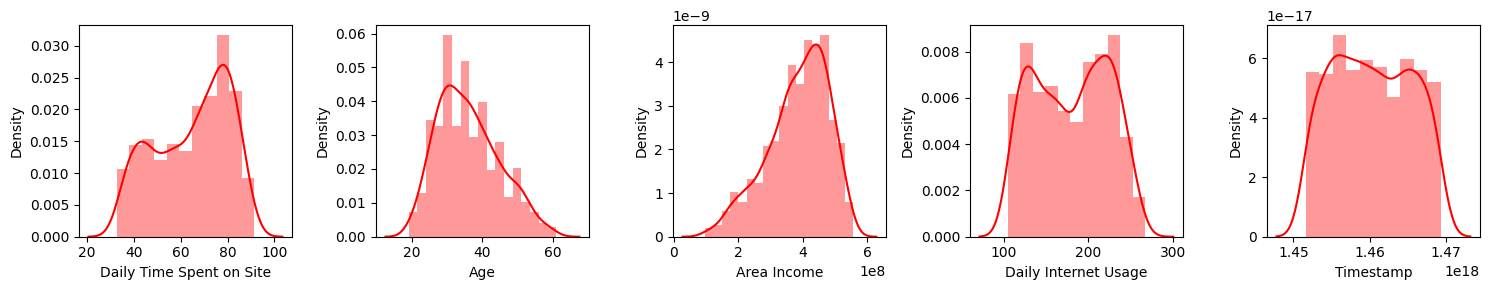

In [ ]:
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.distplot(dfraw[nums[i]], color='red')
    plt.tight_layout()
plt.savefig('Univariate Analysis', dpi = 200)

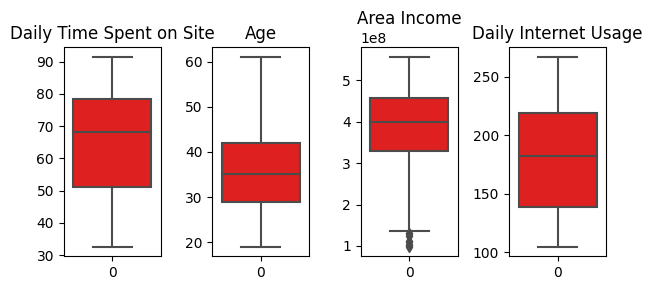

In [ ]:
# Outliers
f_out = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
plt.figure(figsize=(6, 3))
for i in range(0, len(f_out)):
    plt.subplot(1, len(f_out), i+1)
    sns.boxplot(dfraw[f_out[i]], color='red', orient='v')
    plt.title(f_out[i])
    plt.tight_layout()

<Axes: xlabel='Age', ylabel='count'>

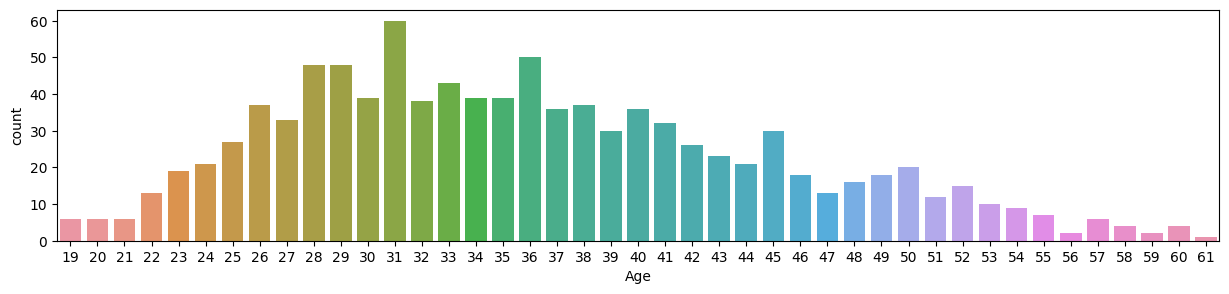

In [ ]:
#get the info of the number of ad clicked
fig = plt.figure(figsize = (15, 3))
sns.countplot(x ='Age', data = dfraw)

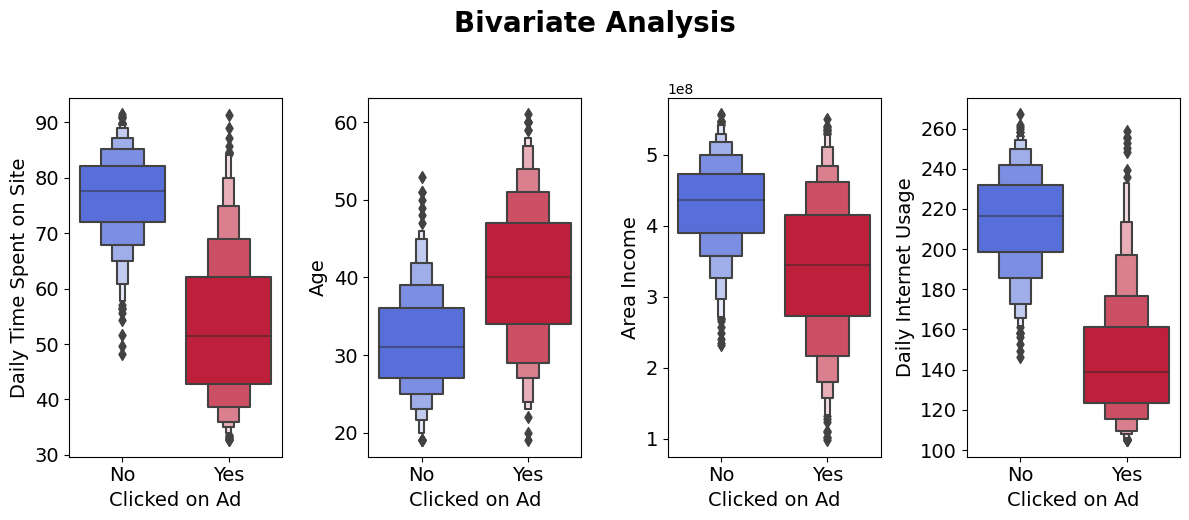

In [ ]:
# Making new list without timestamp
f = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
plt.figure(figsize=(12,5))
for i in range(0,len(f)):
    plt.subplot(1,len(f),i+1)
    sns.boxenplot(x=dfraw['Clicked on Ad'], y=dfraw[f[i]], palette = ['#4361EE', '#D90429'])
    plt.xlabel('Clicked on Ad', fontsize=14)
    plt.ylabel(f[i], fontsize=14)
    plt.tick_params(axis='both', which = 'major', labelsize=14)
    plt.tight_layout()
plt.suptitle('Bivariate Analysis', fontweight='bold', fontsize=20, y=1.03)
plt.savefig('Bivariate Analysis', dpi = 200)
plt.tight_layout()
plt.show()


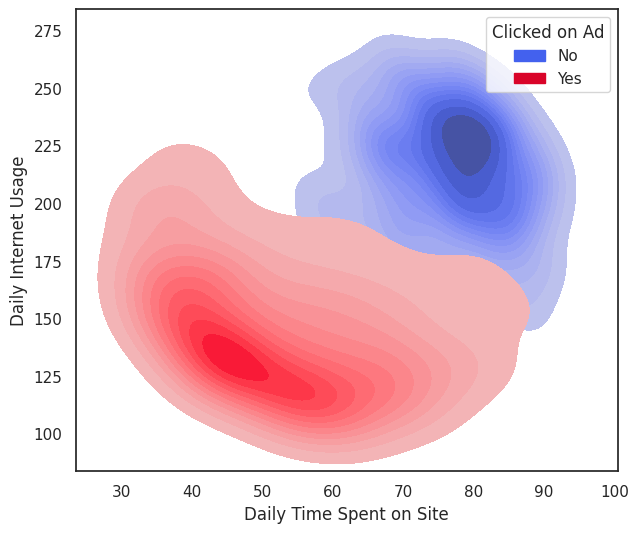

In [ ]:
# Correlation between daily internet usage and time spent on site
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(7, 6))
sns.kdeplot(data = dfraw, x='Daily Time Spent on Site', y='Daily Internet Usage', n_levels=15, fill=True, legend=True,
            bw_method = 'scott', bw_adjust =1, cut=2, palette=['#4361EE', '#D90429'], hue='Clicked on Ad');
plt.savefig('Corr-Daily Internet Usage-Time Spent on Site', dpi = 200)

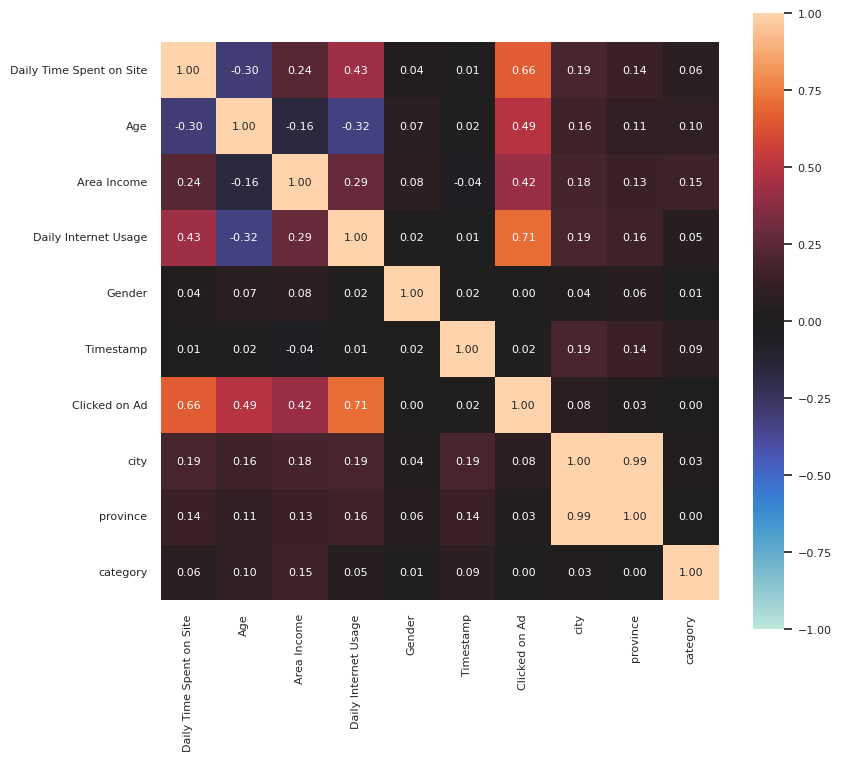

In [ ]:
# Correlation Matrix Heatmap
import matplotlib
from dython.nominal import associations
fig, ax = plt.subplots(figsize=(9, 8))
plt.tick_params(axis='both', which='major', labelsize=8)
matplotlib.rc('xtick', labelsize=8)
matplotlib.rc('ytick', labelsize=8)
plt.rcParams.update({'font.size': 8})
associations(dfraw, ax=ax, plot=False);
plt.savefig('Corr Matrix Heatmap', dpi = 200)

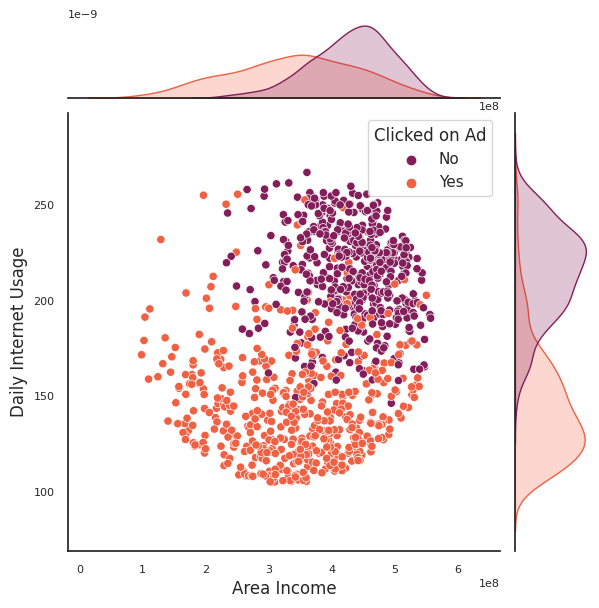

In [ ]:
sns.jointplot(x='Area Income',y='Daily Internet Usage', data=dfraw, hue="Clicked on Ad", palette='rocket')

# Data Cleaning

## Handling Missing Values

In [ ]:
# View number of missing values
null_cols = dfraw.columns[dfraw.isnull().any()]
df_null = dfraw[null_cols].isnull().sum().to_frame().reset_index()
df_null.columns = ['Feature', 'Counts']
df_null['Percentage(%)'] = round(df_null['Counts']/len(dfraw) * 100, 3)
df_null

,Feature,Counts,Percentage(%)
0,Daily Time Spent on Site,13,1.3
1,Area Income,13,1.3
2,Daily Internet Usage,11,1.1
3,Gender,3,0.3


In [ ]:
# Handling missing values
ncols = ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']
dfraw[ncols] = dfraw[ncols].fillna(dfraw[ncols].median())

dfraw['Gender'] = dfraw['Gender'].fillna(dfraw['Gender'].mode()[0])

print(f'Is still there null values? {dfraw.isnull().any().any()}')

Is still there null values? False


## Feature Extraction

In [ ]:
dfcleaned = dfraw.copy()

In [ ]:
dfcleaned['Year'] = dfcleaned['Timestamp'].dt.year
dfcleaned['Month'] = dfcleaned['Timestamp'].dt.month
dfcleaned['Week'] = dfcleaned['Timestamp'].dt.isocalendar().week
dfcleaned['Day'] = dfcleaned['Timestamp'].dt.day


In [ ]:
dfcleaned.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
184,85.56,29,375711560.0,210.46,Perempuan,2016-06-05 13:16:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,6,22,5
69,78.53,34,227758860.0,131.72,Perempuan,2016-04-22 20:10:00,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Fashion,2016,4,16,22
882,86.81,29,355745180.0,199.62,Laki-Laki,2016-02-21 16:57:00,No,Pontianak,Kalimantan Barat,Health,2016,2,7,21
239,73.27,32,469794220.0,234.75,Laki-Laki,2016-01-29 20:16:00,No,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Bank,2016,1,4,29
787,59.96,33,540005270.0,197.66,Perempuan,2016-01-14 08:27:00,Yes,Surabaya,Jawa Timur,Travel,2016,1,2,14


In [ ]:
# Shorten unique value
dfcleaned['province'] = np.where(dfcleaned['province']=='Daerah Khusus Ibukota Jakarta', 'DKI Jakarta',
                                 np.where(dfcleaned['province']=='Jawa Barat', 'Jawa Barat', 'Lainnya'))

## Feature Encoding

In [ ]:
cats_encode = ['Gender','Clicked on Ad','city','province','category']

for col in cats_encode:
  print(f'value counts of column {col}')
  print(dfcleaned[col].value_counts())
  print('---'*10, '\n')

value counts of column Gender
Perempuan    521
Laki-Laki    479
Name: Gender, dtype: int64
------------------------------ 

value counts of column Clicked on Ad
No     500
Yes    500
Name: Clicked on Ad, dtype: int64
------------------------------ 

value counts of column city
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Na

In [ ]:
# Label Encoding for `Clicked on Ad`
dfcleaned['Clicked on Ad'] = dfcleaned['Clicked on Ad'].replace({'No':0, 'Yes':1})

# OHE for Gender, Province, and Category
dfcleaned = pd.get_dummies(dfcleaned, columns=['Gender', 'province', 'category'])

## Feature Selection

In [ ]:
dfselect = dfcleaned.copy()
dfselect = dfselect.drop(columns = ['city', 'Timestamp'])
dfselect.sample(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,Year,Month,Week,Day,Gender_Laki-Laki,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
881,79.18,31,409107930.0,236.96,0,2016,1,1,10,0,...,0,0,0,0,0,1,0,0,0,0
826,83.48,31,415386930.0,222.72,0,2016,3,9,4,1,...,0,0,0,0,0,0,0,1,0,0
502,66.17,26,445061540.0,228.70,0,2016,5,18,2,0,...,0,0,0,0,1,0,0,0,0,0


# Modeling

In [ ]:
dfselect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Clicked on Ad             1000 non-null   int64  
 5   Year                      1000 non-null   int64  
 6   Month                     1000 non-null   int64  
 7   Week                      1000 non-null   UInt32 
 8   Day                       1000 non-null   int64  
 9   Gender_Laki-Laki          1000 non-null   uint8  
 10  Gender_Perempuan          1000 non-null   uint8  
 11  province_DKI Jakarta      1000 non-null   uint8  
 12  province_Jawa Barat       1000 non-null   uint8  
 13  province_Lainnya          1000 non-null   uint8  
 14  category_

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
features = dfselect.select_dtypes(["float64", "int64", "uint8"]).columns
x = dfselect[features].drop('Clicked on Ad', axis=1)
y = dfselect['Clicked on Ad']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Modeling w/o Scaling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from collections import defaultdict

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Modeling without scaling
def mymodel(xtrain,xtest,ytrain,ytest):
  result = defaultdict(list)

  KNN = KNeighborsClassifier()
  LR = LogisticRegression()
  DTC = DecisionTreeClassifier()
  RFC = RandomForestClassifier()
  XGB = XGBClassifier()

  list_model = [('K-Nearest Neighbor',KNN),
                  ('Logistic Regression',LR),
                  ('Decision Tree',DTC),
                  ('Random Forest',RFC),
                  ('XGB',XGB)]

  for model_name, model in list_model:
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)

    accuracy = accuracy_score(ytest,ypred)
    recall = recall_score(ytest,ypred)
    precision = precision_score(ytest,ypred)
    result['model_name'].append(model_name)
    result['model'].append(model)
    result['accuracy'].append(accuracy)
    result['recall'].append(recall)
    result['precision'].append(precision)

  return result

In [ ]:
print('\nModeling Without Feature Scaling')
result = mymodel(xtrain,xtest,ytrain,ytest)
result = pd.DataFrame(result)
result


Modeling Without Feature Scaling


,model_name,model,accuracy,recall,precision
0,K-Nearest Neighbor,KNeighborsClassifier(),0.680000,0.636364,0.710145
1,Logistic Regression,LogisticRegression(),0.486667,0.000000,0.000000
2,Decision Tree,DecisionTreeClassifier(),0.936667,0.941558,0.935484
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.953333,0.954545,0.954545
4,XGB,"XGBClassifier(base_score=None, booster=None, c...",0.946667,0.935065,0.960000


## Modeling w/ Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
xtrain_scaled = minmax_scaler.fit_transform(xtrain)
xtest_scaled = minmax_scaler.transform(xtest)

print('\nModeling With Feature Scaling')
result2 = mymodel(xtrain_scaled,xtest_scaled,ytrain,ytest)
result2 = pd.DataFrame(result2)
result2


Modeling With Feature Scaling


,model_name,model,accuracy,recall,precision
0,K-Nearest Neighbor,KNeighborsClassifier(),0.823333,0.759740,0.879699
1,Logistic Regression,LogisticRegression(),0.953333,0.935065,0.972973
2,Decision Tree,DecisionTreeClassifier(),0.936667,0.941558,0.935484
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.953333,0.948052,0.960526
4,XGB,"XGBClassifier(base_score=None, booster=None, c...",0.946667,0.935065,0.960000


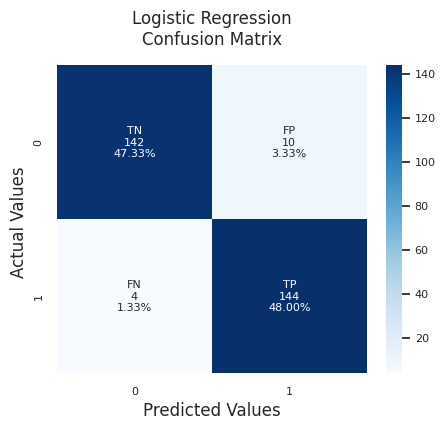

In [ ]:
# Confusion Matrix Logistic Regression

model_LR = result2['model'][1]
predictions_LR = model_LR.predict(xtest_scaled)
cf_matrix = confusion_matrix(predictions_LR, ytest)

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

fig, ax = plt.subplots(figsize=(5, 4))
plt.tick_params(axis='both', which='major', labelsize=8)
plt.rcParams.update({'font.size': 8})
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.title('Logistic Regression\nConfusion Matrix', pad=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values ');
plt.savefig('LogisticReg ConfMtrx', dpi = 200)

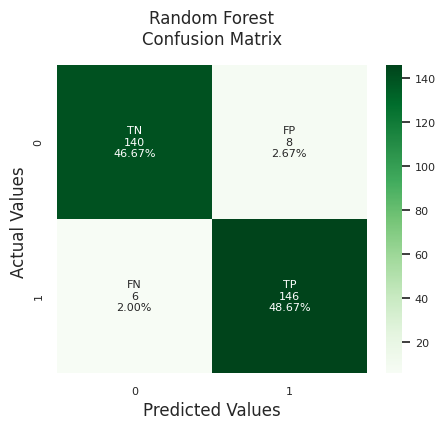

In [ ]:
# Confusion Matrix Logistic Regression

model_RF = result2['model'][3]
predictions_RF = model_RF.predict(xtest_scaled)
cf_matrix = confusion_matrix(predictions_RF, ytest)

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

fig, ax = plt.subplots(figsize=(5, 4))
plt.tick_params(axis='both', which='major', labelsize=8)
plt.rcParams.update({'font.size': 8})
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

plt.title('Random Forest\nConfusion Matrix', pad=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values ');
plt.savefig('RandomF ConfMtrx', dpi = 200)

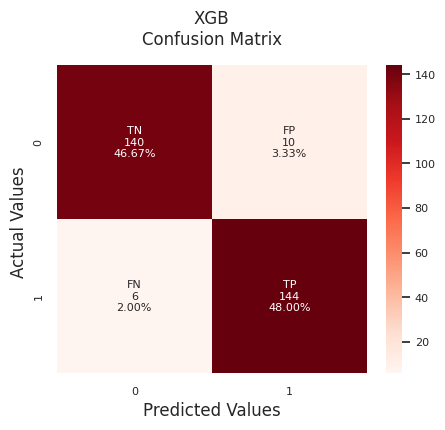

In [ ]:
# Confusion Matrix Logistic Regression

model_XGB = result2['model'][4]
predictions_XGB = model_XGB.predict(xtest_scaled)
cf_matrix = confusion_matrix(predictions_XGB, ytest)

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

fig, ax = plt.subplots(figsize=(5, 4))
plt.tick_params(axis='both', which='major', labelsize=8)
plt.rcParams.update({'font.size': 8})
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

plt.title('XGB\nConfusion Matrix', pad=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values ');
plt.savefig('XGB ConfMtrx', dpi = 200)

The best model is Random Forest. High TP and TP, and low FP.

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.9 MB/s eta 0:00:00


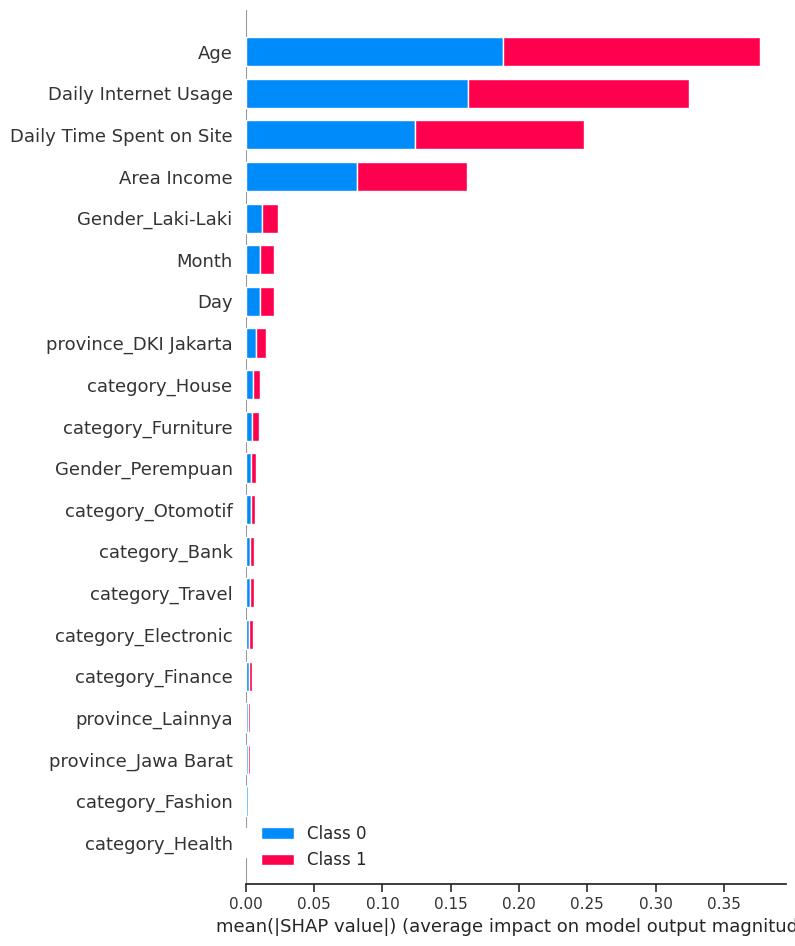

In [ ]:
import shap

# Menampilkan summary shap
explainer = shap.TreeExplainer(model_RF)
shap_values = explainer.shap_values(xtest)
shap.summary_plot(shap_values, xtest)

# Business Recommendation

In [ ]:
df = dfraw.copy()

In [ ]:
# Age Grouping

def age_group(x):
    if x <= 30:
        return '<30'
    elif x <= 40:
        return '31-40'
    elif x <= 50:
        return '41-50'
    else:
        return '> 50'

df['Age_Group'] = df['Age'].apply(lambda x : age_group(x))

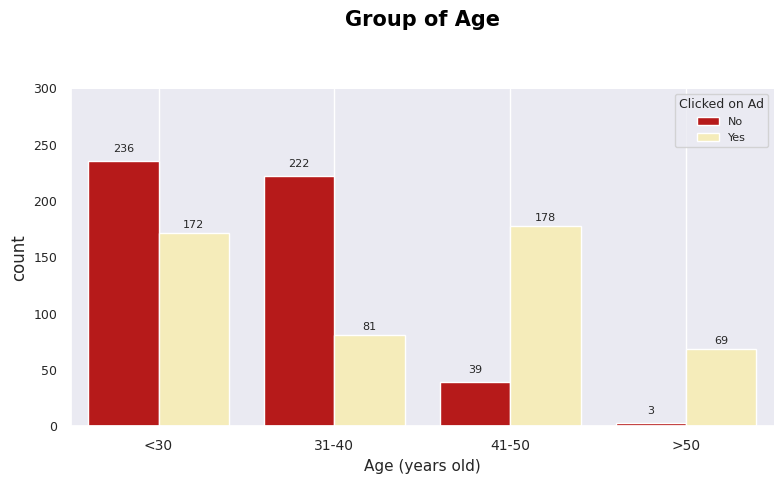

In [ ]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Group of Age", fontsize=15, color='black', weight='bold', pad=45)
sns.countplot(x='Age_Group', data=df, hue='Clicked on Ad', palette=['#D00000', '#FFF3B0'])

plt.tick_params(axis='both', which='major', labelsize=9)
plt.grid()
plt.legend(title='Clicked on Ad', title_fontsize=9, prop={'size':8})
plt.xlabel('Age (years old)', fontsize=11)
plt.xticks(range(0,4,1), labels=['<30', '31-40', '41-50', '>50'], fontsize=10)
plt.ylim(0, 300)
plt.bar_label(ax.containers[0], padding=5, fontsize=8)
plt.bar_label(ax.containers[1], padding=2, fontsize=8)

sns.despine()
plt.tight_layout()
#plt.savefig('grup_age.png')

In [ ]:
dfraw['Daily Internet Usage'].describe()

count    1000.000000
mean      179.894270
std        43.628915
min       104.780000
25%       139.017500
50%       182.650000
75%       218.287500
max       267.010000
Name: Daily Internet Usage, dtype: float64

In [ ]:
from re import X
# Daily Internet Usage

internet_group = []
for x in df['Daily Internet Usage']:
    if x >= 100 and x <= 140:
        group = '100-140'
    elif x >= 141 and x <= 180:
        group = '141-180'
    elif x >= 181 and x <= 220:
        group = '181-220'
    elif x >= 221 and x <= 250:
        group = '221-250'
    else:
        group = '> 250'
    internet_group.append(group)

df['Internet_Group'] = internet_group

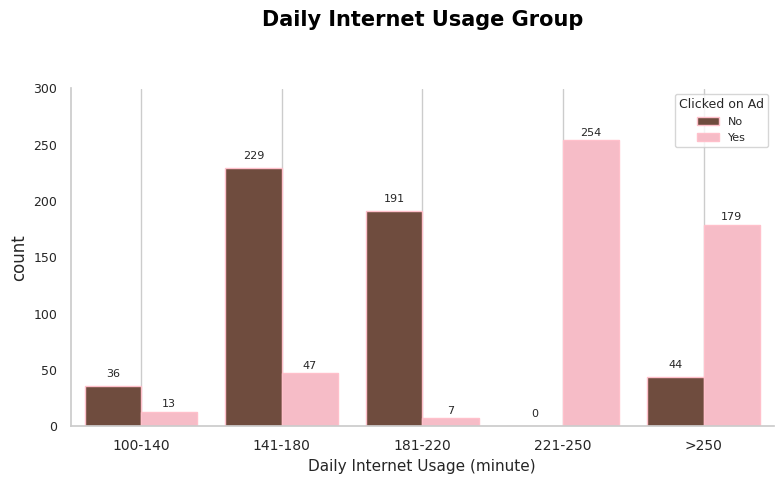

In [ ]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Daily Internet Usage Group", fontsize=15, color='black', weight='bold', pad=45)
sns.countplot(x='Internet_Group', data=df, hue='Clicked on Ad', edgecolor= 'pink', palette=['#774936', '#FFB3C1'])

plt.tick_params(axis='both', which='major', labelsize=9)
plt.grid()
plt.legend(title='Clicked on Ad', title_fontsize=9, prop={'size':8})
plt.xlabel('Daily Internet Usage (minute)', fontsize=11)
plt.xticks(range(0,5,1), labels=['100-140', '141-180', '181-220', '221-250', '>250'], fontsize=10)
plt.ylim(0, 300)
plt.bar_label(ax.containers[0], padding=5, fontsize=8)
plt.bar_label(ax.containers[1], padding=2, fontsize=8)

sns.despine()
plt.tight_layout()
#plt.savefig('grup_Internet.png')